# **Analysis of Suicide Rates and How we can reduce it?**

## Introduction / Background

Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Many more attempt suicide. Suicide occurs throughout the lifespan and is the second leading cause of death among 15-29 year olds globally.

Suicide is a global phenomenon; in fact, 78% of suicides occurred in low- and middle-income countries in 2015. Suicide accounted for 1.4% of all deaths worldwide, making it the 17th leading cause of death in 2015. Effective and evidence-based interventions can be implemented at population, sub-population and individual levels to prevent suicide and suicide attempts.

So the question occurs what can be done to reduce the suicidal rate or attempts?

## Data Source

I have considered two datasets to find answer to question i came up with and these dataset provide enough information for me to come up with solution that may be able to help reduce suicidal rate. 

First dataset (" Suicide Rates Overview 1985 to 2016 ") - This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

Second Dataset (" The Demographic /r/ForeverAlone Dataset ") - is a dataset from reddit survey

Both these datasets I got from Kaggle Datasets

## Data Exploring and Methodology

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['the-demographic-rforeveralone-dataset', 'suicide-rates-overview-1985-to-2016']


In [2]:
suicide_rate_df = pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")
suicide_rate_df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
suicide_rate_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
suicide_rate_df=suicide_rate_df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [5]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
suicide_rate_df.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

In [6]:
#As you can see, most of the HDIForYear value is empty. That's why I want this value deleted.
suicide_rate_df.drop(['HDIForYear','CountryYear'],axis=1,inplace=True)

In [7]:
#1985 min year,2016 max year.

#Now start analysis, min year and max year will find them
min_year=min(suicide_rate_df.Year)
max_year=max(suicide_rate_df.Year)

In [8]:
suicideGender1985=suicide_rate_df.groupby(['Country','Gender']).SuicidesNo.sum()
suicideGender1985

Country                 Gender
Albania                 female       693
                        male        1277
Antigua and Barbuda     female         1
                        male          10
Argentina               female     18326
                        male       63893
Armenia                 female       495
                        male        1410
Aruba                   female        17
                        male          84
Australia               female     15326
                        male       54785
Austria                 female     13195
                        male       36878
Azerbaijan              female       412
                        male        1244
Bahamas                 female        14
                        male          79
Bahrain                 female        80
                        male         383
Barbados                female        33
                        male         144
Belarus                 female     10002
                        ma

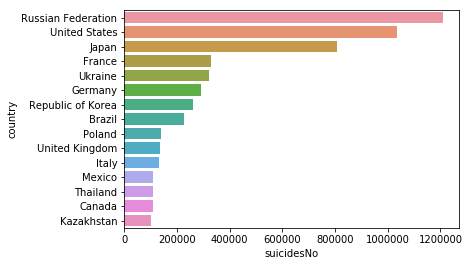

In [9]:
suicidesNo=[]
for country in suicide_rate_df.Country.unique():
    suicidesNo.append(sum(suicide_rate_df[suicide_rate_df['Country']==country].SuicidesNo))
    
suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(suicide_rate_df.Country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)

data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)

sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15])
plt.show()

In the chart above, we can see there are 15 countries sorted out from highest suicidal rate at the top to lowest at the bottom.
As the chart represent, the top 3 countries; Russia, US, and Japan, has a major peak in the total number of suicides. This is due the fact that Russia, US, and Japan all faces with major mental illness and also due to the allowance of having firearm at the home. [4]

In [10]:
group_data=suicide_rate_df.groupby(['Age','Gender'])['SuicidesNo'].sum().unstack()
group_data=group_data.reset_index().melt(id_vars='Age')

group_data_female=group_data.iloc[:6,:]
group_data_male=group_data.iloc[6:,:]

group_data_female

,Age,Gender,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984


In [11]:
group_data_male

,Age,Gender,value
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267
10,55-74 years,male,1228407
11,75+ years,male,431134


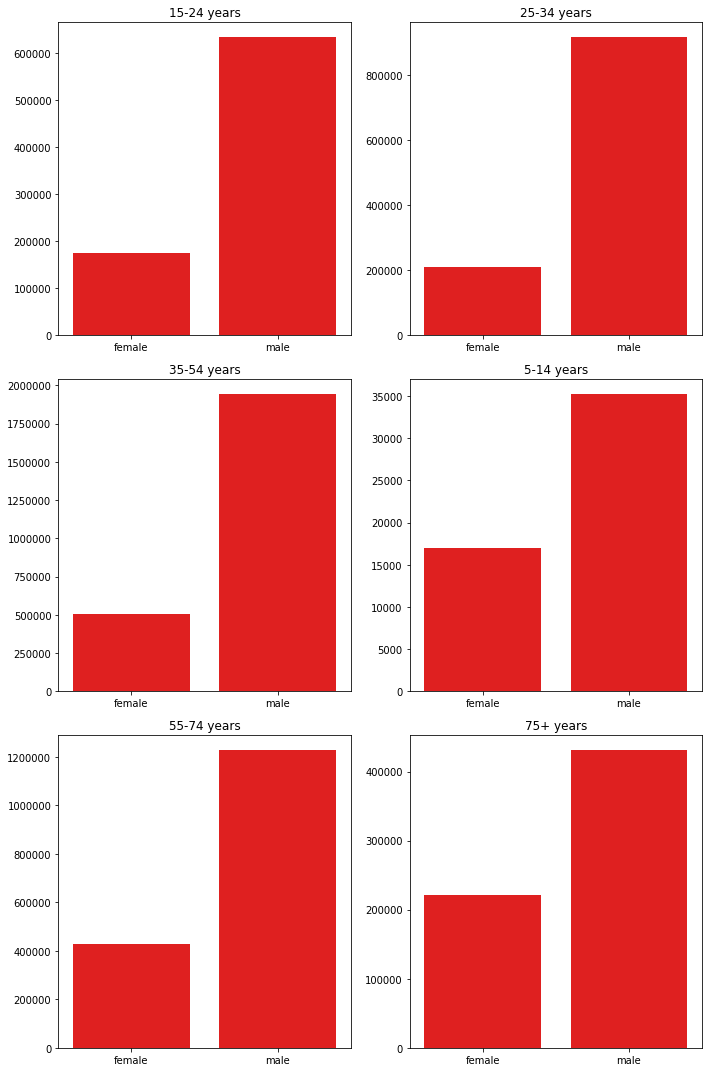

In [12]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='red')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show() 

Above as you can see are the six bar charts comparing male and female suicides number for all age group. We can easily conclude that no matter what the age group is, males tend to attempt suicide much more often with higher successive rates. This is because male tend to use harsher methods when they tend to attempt suicide in comparison to female which led to higher suicidal numbers for males.

In addition to that, the reason for higher male suicide rate is because of our cultural beliefs which lead for men to suicide more often. From the childhood, men are told to be strong and always fight the situations rather than cry it out or talk about it to their families or friends. This is why male suicidal rate are higher since they are not confident enough to talk to others about their situation(s) to others and usually keep it themselves which makes them stressed out or even depressed or feel lonely and so they will choose an easy way out of the problems by suiciding while female are much better at communicating to others about their problems which they can get aid from and it reduces the chances for females to attempt to suicide [1]

In [13]:
suicide_no_1985 = suicide_rate_df[(suicide_rate_df['Year']==min_year)].SuicidesNo.sum()
suicide_no_1985

116063

In [14]:
suicide_no_2015 = suicide_rate_df[(suicide_rate_df['Year']==2015)].SuicidesNo.sum()
suicide_no_2015

203640

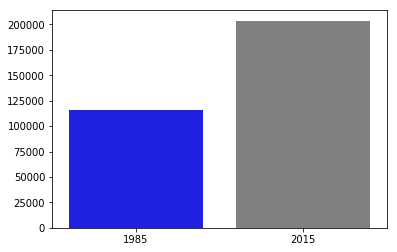

In [15]:
sns.barplot(x=['1985','2015'],y=[suicide_no_1985, suicide_no_2015], palette=['blue', 'grey'])

As we can see, the suicidal rate had increased nearly twice since 1985, one of the reasons behind this is the rise of social media platforms in comparison to 1985. This has made many people become disable to communicate with people in real life, people are so busy using their phone to use social medias that they do not enjoy the life which makes them feel lonely at certain times and also social media has awaken a new form of bullying, "Cyber Bullying", which people bully through these social media platforms which make the one getting bullied feel insignificant and tend to suicide. In addition, social media platforms had people feel insignificant in other ways such as beauty or perfectionism. When a person finds someone with close to perfection looks, they tend to feel inferior and end up getting mentally ill or unstable which can either lead to attempt to suicide and/or threaten the good looking person which may or may not cause that person feel terrified and might end up attempting to suicide [2]

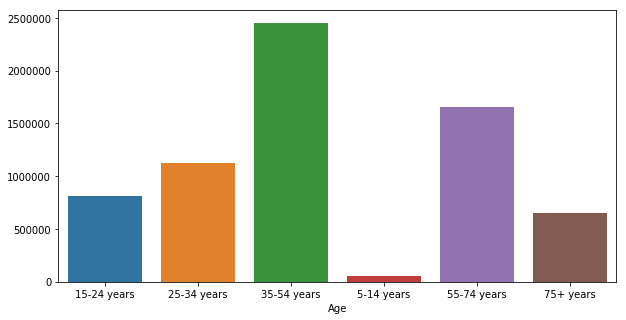

In [16]:
fig, ax = plt.gcf(), plt.gca()
sns.barplot(x=suicide_rate_df.groupby('Age')['SuicidesNo'].sum().index,y=suicide_rate_df.groupby('Age')['SuicidesNo'].sum().values)
fig.set_size_inches(10,5)
plt.show()

**Now let's look at age group and number of suicides**
Let's start from lowest age group which is 5-14 years old, as we can already assume that this age group will have the least number of suicides as kids at that age will only suicide if there is some kind of child abuse and/or by mistakenly doing something which cause them their lives.
At the age group 15-24 years, we can still consider the child abuse by their family member(s) or so. But we also have to consider bullying in school or college as a factor as it is very common in due to being sexist, racist, etc. which can be very common in some places which lead person being bullied to suicide because he/she is too scared and they become mentally ill
Let's consider age 35+ as adults, and we will focus on why do adults suicide. We can assume that there can quite the few causes for them to suicide. To begin with, work pressure, this is very common at that age, it is not the work is pressurizing them but it's more due to feeling hopeless, this may occur when a person doesn't see any success in his work area. To continue, family pressure, this can be considered as a very common issue, as a adult specially men, when there is growing in demand of family needs and they are not able to fulfil them, this cause them to take loans and be in debt which increase there mental illness as their mental health is not stable due to tensions, making them choose easy way out of their situation, however, this doesn't end here since the debt continues to that person family and so increase the chances of suicidal attempt in the family members as well [3]

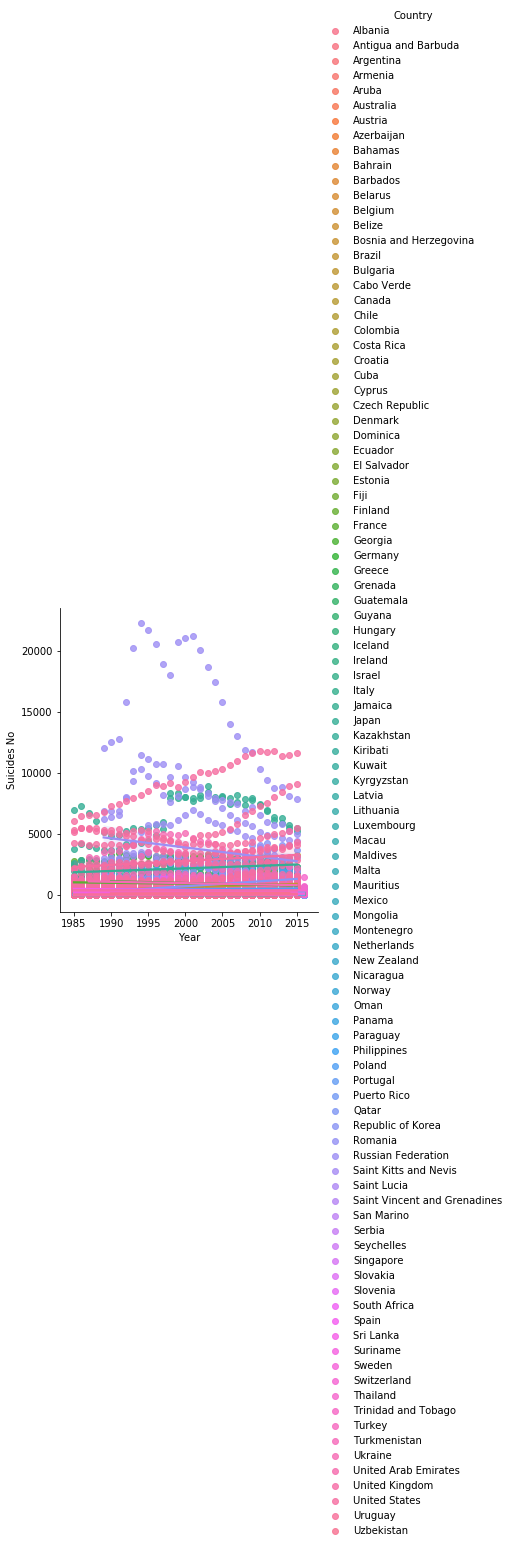

In [17]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="Year", y="SuicidesNo", hue="Country",
               truncate=True, height=5, data=suicide_rate_df)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Suicides No")
plt.show()

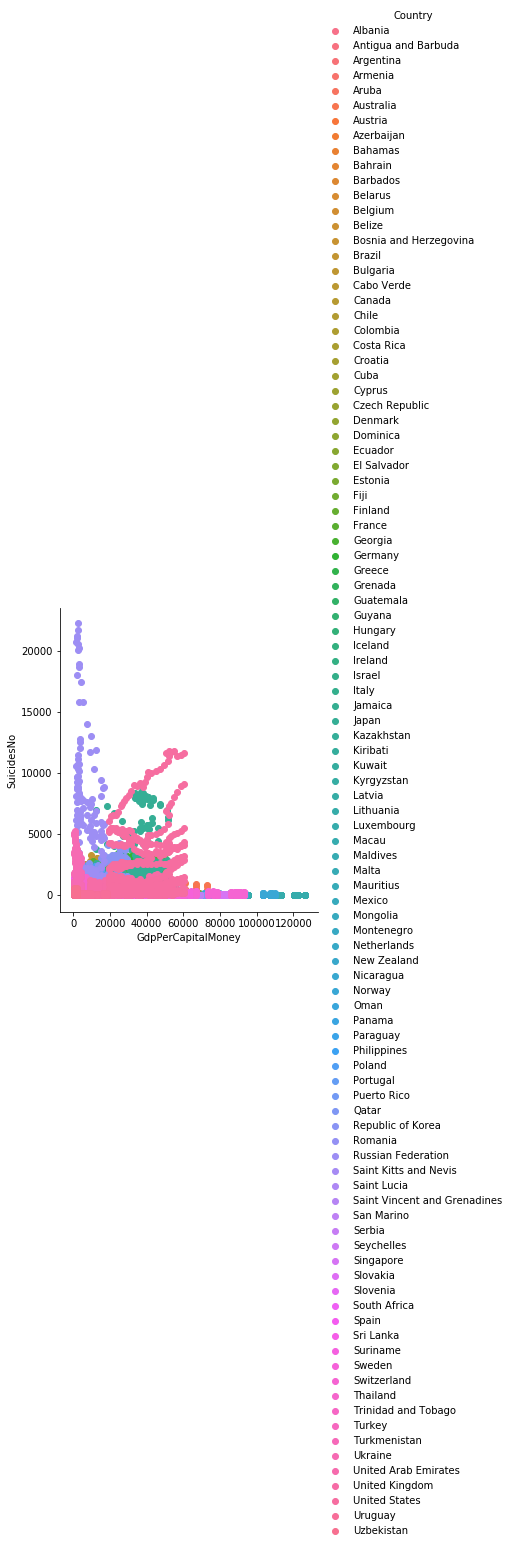

In [18]:
%matplotlib inline
sns.FacetGrid(suicide_rate_df,hue='Country',size=5).map(plt.scatter,'GdpPerCapitalMoney','SuicidesNo').add_legend()
plt.show()

As we can see from both the graphs above, the highest number of suicides is in the country that has the lowest GDP per capita. This conclude that another factor that affects the number of suicides is economical growth of the country. Due to lack of job opportunities for people in undeveloped countries can also increase the risk of suicide attempts since they wouldn't have money to support their needs or even their family. Not only the country lacks job opportunities but unemployment rate increase as businesses doesn't make profit to keep paying salaries and so some employee(s) can't handle the shock of getting fired since they have bills to clear which leads to suicidal attempt

## Changing to different Dataset for further research

In [19]:
foreveralone_df = pd.read_csv("../input/the-demographic-rforeveralone-dataset/foreveralone.csv")
foreveralone_df.head(5)

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [20]:
foreveralone_df.describe()

,age,friends
count,469.000000,469.000000
mean,23.963753,7.956716
std,6.023526,34.371500
min,12.000000,0.000000
25%,20.000000,1.000000
50%,23.000000,3.000000
75%,26.000000,7.000000
max,70.000000,600.000000


In [21]:
foreveralone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 19 columns):
time                     469 non-null object
gender                   469 non-null object
sexuallity               469 non-null object
age                      469 non-null int64
income                   469 non-null object
race                     469 non-null object
bodyweight               469 non-null object
virgin                   469 non-null object
prostitution_legal       469 non-null object
pay_for_sex              469 non-null object
friends                  469 non-null float64
social_fear              469 non-null object
depressed                469 non-null object
what_help_from_others    469 non-null object
attempt_suicide          469 non-null object
employment               469 non-null object
job_title                457 non-null object
edu_level                469 non-null object
improve_yourself_how     469 non-null object
dtypes: float64(1), int64(1), object(17)

In [22]:
foreveralone_df.isnull().sum()

time                      0
gender                    0
sexuallity                0
age                       0
income                    0
race                      0
bodyweight                0
virgin                    0
prostitution_legal        0
pay_for_sex               0
friends                   0
social_fear               0
depressed                 0
what_help_from_others     0
attempt_suicide           0
employment                0
job_title                12
edu_level                 0
improve_yourself_how      0
dtype: int64

In [23]:
foreveralone_df['gender'] = foreveralone_df['gender'].map({'Transgender female': 'Female', 'Transgender male' : 'Male', 'Male': 'Male', 'Female': 'Female'})

In [24]:
foreveralone_df

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None
5,5/17/2016 20:09:09,Male,Straight,24,"$50,000 to $74,999",White non-Hispanic,Normal weight,Yes,No,Yes but I haven't,2.0,Yes,Yes,date coaching,Yes,Employed for wages,game programmer,Bachelor’s degree,"Joined a gym/go to the gym, join clubs/socual ..."
6,5/17/2016 20:10:56,Male,Straight,22,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,2.0,Yes,Yes,"Set me up with a date, date coaching",No,Employed for wages,Janitor,"High school graduate, diploma or the equivalen...",None
7,5/17/2016 20:11:13,Female,Gay/Lesbian,24,"$20,000 to $29,999",White non-Hispanic,Normal weight,Yes,No,No,10.0,Yes,Yes,"wingman/wingwoman, date coaching",Yes,Employed for wages,Fabricator,Trade/technical/vocational training,"Therapy, join clubs/socual clubs/meet ups, Non..."
8,5/17/2016 20:11:52,Male,Straight,20,"$10,000 to $19,999",White non-Hispanic,Overweight,Yes,No,Yes but I haven't,0.0,Yes,Yes,Set me up with a date,No,Employed for wages,cashier,"Some college, no degree","Joined a gym/go to the gym, Therapy"
9,5/17/2016 20:13:37,Male,Straight,33,"$50,000 to $74,999",White non-Hispanic,Overweight,No,No,Yes but I haven't,6.0,Yes,Yes,Set me up with a date,Yes,Employed for wages,Software Engineer,Master’s degree,Therapy


### Feature selection and target selection

In [25]:
columns = ['gender','sexuallity','income','bodyweight','virgin','friends','social_fear','depressed','employment']
target = foreveralone_df['attempt_suicide']

### Importing libraries for machine learning model

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

### Applying LabelEncoder to make textual into unique id for Decision Tree Classifier

In [27]:
le = LabelEncoder()
foreveralone_df['gender'] = le.fit_transform(foreveralone_df['gender'])
foreveralone_df['sexuallity'] = le.fit_transform(foreveralone_df['sexuallity'])
foreveralone_df['income'] = le.fit_transform(foreveralone_df['income'])
foreveralone_df['bodyweight'] = le.fit_transform(foreveralone_df['bodyweight'])
foreveralone_df['virgin'] = le.fit_transform(foreveralone_df['virgin'])
foreveralone_df['social_fear'] = le.fit_transform(foreveralone_df['social_fear'])
foreveralone_df['depressed'] = le.fit_transform(foreveralone_df['depressed'])
foreveralone_df['employment'] = le.fit_transform(foreveralone_df['employment'])

### Applying Principle Component Analysis onto dataset

In [28]:
pca = PCA()
foreveralone_df[columns] = pca.fit_transform(foreveralone_df[columns])

### Defining classifier model and fitting in data and target for classification

In [29]:
clf = DecisionTreeClassifier()
clf.fit(foreveralone_df[columns], target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Checking the importance of each feature we selected for classification

In [30]:
clf.feature_importances_

array([0.06028604, 0.12725372, 0.19011531, 0.0879341 , 0.14258791,
       0.11956534, 0.07663918, 0.11143582, 0.08418258])

**['gender', 'sexuallity', 'income', 'bodyweight', 'virgin', 'friends', 'social_fear', 'depressed', 'employment']
Importance in accordance to the array of the resulted with the array i have define.**


As we can see, the most importance feature is the income which makes it that if the income is low then the chances of attempting to suicide tends to be higher. Also, we can see if a person is a virgin then that person tend to attempt suicide and this can be due to lack of confidence in talking to others or social fear which makes them lack friends. Gender is one of important feature of suicidal attempt according to dataset. We can also see some portion of suicidal attempt due to their sexual preferences which most probably rejected by their families/friends/society. Depression or mental illness also play a part in suicide attempts. Employment basically describe a person occupation which also affects in some area such as student(being bullied), out of work(unemployed),etc.

### Validating our classifier model performance

In [31]:
target_pred = cross_val_predict(clf,foreveralone_df[columns],target,cv=3)
print('accuracy: ', accuracy_score(target, target_pred))
print('confusion matrix:')
print(confusion_matrix(target, target_pred))
print('classification report:')
print(classification_report(target, target_pred))

accuracy:  0.7078891257995735
confusion matrix:
[[315  69]
 [ 68  17]]
classification report:
              precision    recall  f1-score   support

          No       0.82      0.82      0.82       384
         Yes       0.20      0.20      0.20        85

   micro avg       0.71      0.71      0.71       469
   macro avg       0.51      0.51      0.51       469
weighted avg       0.71      0.71      0.71       469



## Proposed Solutions

We have seen that there were quite a few factors that affects the person choice to attempt suicide, unlike anything else, reducing suicide rate can be difficult as it mainly focus on person behaviour on how intake and resolve the situation. However, we can consider few factors that may help to reduce or help change a person behavior in a positive favor to avoid suiciding.


Let's begin with firearm, as we saw above, highest suicidal rate is in Russia and/or US where firearm is allowed to be owned by public which increase the chances of suicidal rate, so to solve this, Government should consider being more strict when it comes to the allowance of owning firearm. It should only be allowed if there is a valid reason(s) for person to be keeping firearm at home.


What can be done to help reduce suicidal rate in male gender? This is very important since we have saw above how much difference there is in suicide numbers between male and female. As we discuss, that male were raised in a manner where they have to act tough and hide their emotions. Family members and friends have to show their support no matter if its female or male to share what they going through and encourage them to share their emotions. On top of that, Government also should campaign to support citizens to reach out for help from each others and provide therapist to those that are actually in need which can help them come up with solutions that can be dealt with their mental illness. It doesn't only have to be some depression kind of illness but also people who are going through stress out can seek out for solution to deal with it. As for students who gets bullied at school, should seek help from their parents, in addition they can go see school council to complain. School should also support by taking a strict actions against those students who bully so, in the future students will think twice before bullying anyone.


Lastly, let's focus on economic growth, government should create opportunities for its people for jobs and focus on increasing the level of living standard to be better. Increasing the job opportunities will increase economic growth as people will spend more money as well. Another step government may take in consideration is to give loan at lower interest so people can start their own business which will increase job opportunities for its people and so that way the country economic will grow and people will have a better lives which will reduce the number suicidal attempts by poor or unemployed people [5]

## Conclusion

To conclude, suiciding is an act of personal behavior of their life but a person usually suicide due to being in some kind of situation. There are certainly many factors that increase the chances of attempting to suicide, however, there are few things that can be considered in order to reduce the suicidal rate. First of all, Government has to consider taking actions upon owning a firearm and should only allow to those who in need for their safety. Next, Government has to run campaign for age groups in order to make people in need to be able to seek out for help rather than keeping everything stress up to oneself, no matter if they are depressed, being bullied or any kind of mental illness. Last but not the least, Government have to consider development of the country and to improve the standard of living as people tend to suicide lesser when they have better living standards. These are few of the consideration that can be taken in account in order to reduce suicide rate.

## References

http://www.bbc.com/future/story/20190313-why-more-men-kill-themselves-than-women [1]

https://www.livescience.com/62781-why-are-suicide-rates-rising.html [2]

http://www.mentalhealthamerica.net/preventing-suicide-older-adults [3]

https://www.quora.com/Are-the-Russian-people-allowed-to-have-guns [4]

https://www.economicshelp.org/blog/4493/economics/how-to-increase-economic-growth/ [5]